# Select dummy data for Alexandra to start testing machine learning algorithms for identifying controls on snow cover

In [1]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# path to snow-cover-mapping/
base_path = '/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping/'

# path to study-sites/
study_sites_path = '/Users/raineyaberle/Google Drive/My Drive/Research/PhD/snow_cover_mapping/study-sites/'

# site names to include
site_names = ['Wolverine', 'Gulkana', 'LemonCreek', 'SouthCascade', 'Sperry']

/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_10236/4242826688.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_est_site_select[RGI_column] = RGI[RGI_column].values[0]
/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_10236/4242826688.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_est_site_select[RGI_column] = RGI[RGI_column].values[0]
/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_10236/4242826688.py:48: SettingWithCopyWarning: 
A value is trying to be set 

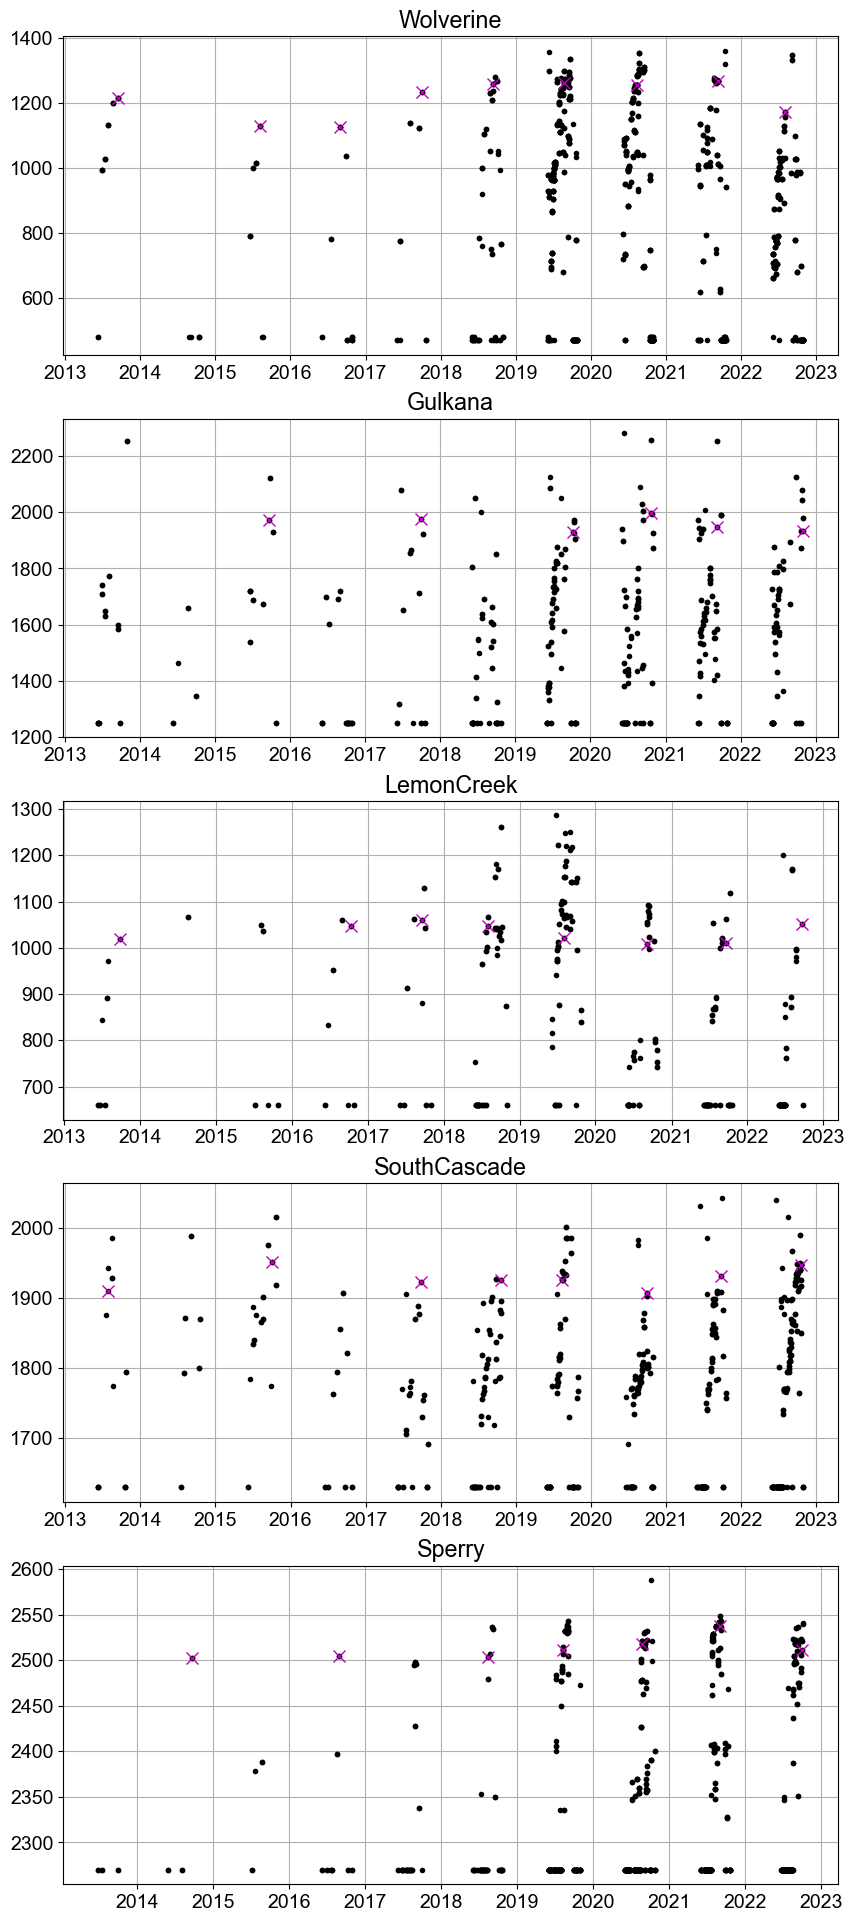

data frame saved to file
figure saved to file


In [6]:
# set up figure
fig, ax = plt.subplots(len(site_names), 1, figsize=(10,24))
plt.rcParams.update({'font.size':14, 'font.sans-serif':'Arial'})

# initialize dataframes
df = pd.DataFrame()
df_select = pd.DataFrame()

# loop through sites
for i, site_name in enumerate(site_names[0:5]):

    # load RGI outline
    RGI_path = study_sites_path + site_name + '/AOIs/' + site_name + '_RGI_outline.shp'
    RGI = gpd.read_file(RGI_path)
    
    # load snowlines
    sl_est_path = study_sites_path + site_name +'/imagery/snowlines/' 
    sl_fns = glob.glob(sl_est_path + '*.csv')
    for sl_fn in sl_fns:
        sl_est = pd.read_csv(sl_fn)
        sl_est['datetime'] = sl_est['datetime'].astype('datetime64[ns]')
        # concatenate to full dataframe
        df = pd.concat([df, sl_est])
    
    # plot snowlines just for site
    sl_est_site = df.loc[df['study_site']==site_name]
    sl_est_site = sl_est_site.sort_values(by='datetime').reset_index(drop=True)
    ax[i].plot(sl_est_site['datetime'], sl_est_site['snowlines_elevs_median_m'], '.k')
    ax[i].set_title(site_name)
    ax[i].grid()
    
    # select points for training data
    if i==0:
        Iselect = [15, 30, 40, 68, 119, 350, 560, 800, 1006]
    elif i==1:
        Iselect = [42, 92, 249, 363, 458, 563]
    elif i==2:
        Iselect = [10, 31, 45, 85, 160, 235, 310, 387]
    elif i==3:
        Iselect = [6, 48, 102, 195, 245, 395, 535, 755]
    elif i==4:
        Iselect = [10, 30, 108, 260, 490, 775, 1050]
    sl_est_site_select = sl_est_site.iloc[Iselect, :]
    
    # add RGI info to dataframe
    RGI_columns = ['O1Region', 'O2Region', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
    for RGI_column in RGI_columns:
        sl_est_site_select[RGI_column] = RGI[RGI_column].values[0]
    
    # concatenate to full selected points dataframe
    df_select = pd.concat([df_select, sl_est_site_select])
        
    # plot selected points
    ax[i].plot(sl_est_site_select['datetime'], sl_est_site_select['snowlines_elevs_median_m'], 
               'xm', linewidth=2, markersize=8)
plt.show()

# adjust dataframe
df_select.reset_index(drop=True, inplace=True)
df_select_adj = df_select[['study_site', 'datetime', 'snowlines_elevs_median_m', 'SCA_m2', 'AAR', 
                           'O1Region', 'O2Region', 'Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']]

# save dataframe to file
df_select_adj.to_csv('training_data.csv')
print('data frame saved to file')

# save figure to file
fig.tight_layout()
fig.savefig('training_data_selected_points.png', facecolor='w', dpi=200)
print('figure saved to file')

,study_site,datetime,snowlines_elevs_median_m,SCA_m2,AAR,O1Region,O2Region,Area,Zmin,Zmax,Zmed,Slope,Aspect
0,Wolverine,2013-09-15 15:10:00,1217.377579,9.281700e+06,0.602324,1,4,16.749,426,1636,1267,11.0,188
1,Wolverine,2015-08-04 15:07:39,1130.237648,1.123560e+07,0.728695,1,4,16.749,426,1636,1267,11.0,188
2,Wolverine,2016-08-31 15:02:02,1128.165947,1.112130e+07,0.721450,1,4,16.749,426,1636,1267,11.0,188
3,Wolverine,2017-09-29 15:15:10,1234.305453,7.414300e+06,0.969114,1,4,16.749,426,1636,1267,11.0,188
4,Wolverine,2018-09-13 15:07:39,1259.427673,8.747100e+06,0.592622,1,4,16.749,426,1636,1267,11.0,188
5,Wolverine,2019-08-25 15:18:35,1262.483019,2.764600e+06,0.366945,1,4,16.749,426,1636,1267,11.0,188
6,Wolverine,2020-08-12 15:28:33,1254.780865,9.115800e+06,0.632019,1,4,16.749,426,1636,1267,11.0,188
7,Wolverine,2021-09-11 15:28:44,1267.770837,9.125400e+06,0.592582,1,4,16.749,426,1636,1267,11.0,188
8,Wolverine,2022-08-02 15:28:48,1173.325647,2.418300e+06,0.364344,1,4,16.749,426,1636,1267,11.0,188
9,Gulkana,2015-09-21 15:07:13,1971.079590,1.526130e+07,0.984441,1,2,17.567,1162,2438,1858,14.0,172
